# Data Science Workshop Project

## 1. Introduction

### 3.1 Student's Details

* First name: Elron
* Last name: Tvizer
* Identification number: 301801346

### 3.2 Project's Goals

This project is meant to help an Israeli Air Force helicopters squadron to improve its maintenance and planning processes, to reduce the overall number of helicopters' malfunctions, and to improve the response time of handling a malfunction. 

It is well believed for some time that weather phenomena have a great impact of helicopters' serviceability, thus this project intends to clarify this assumption. 

Furthermore, it is meant to provide insights about the recommended weekly training flights plan, which by default determines the schedule of the maintenance routines and carried out flight, something which may contribute to increase the availability of helicopters, thus increasing the squadron's flexibility to train its pilots. 

I will seek to perform the above by analysing and extracting insights from the data provided by the Israeli Air Force, as well as by building a regression model for classifying malfunctions based on different weather features, extracted from the Israeli Meteorological Service servers.

**Thus, the high-level goals of this project are:**

* Conduct an analysis of various aspects of the malfunctions data provided, with respect to the squadron's two main working locations (Ramon Air Force base and Ramat David Air Force base).


* Conduct an analysis to conclude the various weekly training flight plans implemented (as projected by the data provided by the Israeli Air Force), then analysing its effect on malfunctions' amount and type, in favour of improving the squadron's work.


* Find connections between different tail numbers (helicopters), based on the provided datasets, to give the technical department a different viewpoint of the platform's maintenance activities and regulations.  


* Build a regression model for classifying malfunctions, given the input of weather variables (on ground).


* Build a regression model for classifying malfunctions, given the input of weather variables (during or after training flights departed from Ramat David Air Force base).

### 3.3 Motivation

Attached is an official request signed by the squadron's deputy commander, requesting to carry out the aforementioned analysis work and recommendations (for the part concerning weather damage impacts):

![IAF_Request](images/IAF_Request.jpg)

Personally, as an active reserve officer in the squadron, and as having previously performed a commanding role thus aware of the weighty implications of the relatively low serviceability percentages of the squadron's helicopters, I find a great interest in contributing to this kind of analysis and classification work. 

As stated in the official request, no analysis of the provided malfunctions data is currently being performed, other than calculations of statistics, which do not help make data-driven decisions (for example: average time between malfunctions, percentage of serviceability (i.e. the total number of helicopters available for flight each morning), etc.). Moreover, various decisions regarding helicopters' spare parts, and the presence of maintenance personnel in the heliport (i.e. where helicopters are parked) are a result of rules of thumb, and "gut feelings", thus not knowledge-based.

Many times, in the past the weekly flights plan has changed. As mentioned, the weekly flights plan dictates the squadron's progression in training plan, and involves many resources and constraints (for example: meeting the maintenance routines, allocating the required training resources - flight areas, etc.). A work which connects the serviceability of the squadron's helicopters and the weekly flights plan has been conducted in the past, albeit in a non-comprehensive and inclusive manner (based on a small number of samples, and without a specific reference to the malfunctions issue). In this work I would like to reveal the impacts of the weekly flights plan on the malfunctions amount and type, thus allowing a better decisions to be taken.

Another important feature of a helicopter is it being able to fly under difficult weather conditions. The squadron's helicopters are capable and required to perform their missions in the presence of hard weather conditions. However, increased number of malfunctions, may reduce the helicopters' serviceability for carrying out these and other missions. A decision for having flights under difficult weather conditions on purpose, may increase the risk factors for specific types of malfunctions. Thus, having this knowledge may spur the squadron's commanders to make some improvements meant to handle these increased risk factors wisely (for example: manufacturing a dedicated sealing component, changing the flight areas in real-time, etc.).

Squadron's operations on ground during various weather conditions is another significant issue, since more than 95% of time helicopters are not in air. As stated in the official request - the helicopters are routinely parked outdoor (unlike other aircrafts), and therefore more exposed to weather damage - wind, rain, extreme temperatures (heat or cold), humidity and radiation. Some equipment may be in use, if it turns out that these weather damages are causing a great increase in the number of malfunctions.

**To summarize, these are the general and personal motivations for carrying out this project:**
* This project may contribute to increase the serviceability of the squadron's helicopters, by providing concrete recommendations for adjusting maintenance processes and flight planning.
* This contribution is translated into a better and more accurate utilization of the Israeli taxpayer's money, by increasing the availability of helicopters for flights, instead of being grounded.
* A personal desire to promote an issue that has greatly influenced, and still affects, the service experience of many others and mine.
* Proof of concept of performing such analysis work, outside the Air Force, allowing additional squadrons to take the same road. This may also allow further un-classified data to be analysed outside the Air Force, offering an outsourced way of doing these kinds of jobs.

## 2. Domain-specifc Background

### 2.1 Technical Departments

Helicopter’s maintenance routines are being performed by different technical departments:

* **Class A** - a part of the squadron's chain of command, this department is responsible for the weekly and daily maintenance routines. This department is divided into different teams, each of which is responsible for a different technical domain. In addition, this department personnel are present on site (heliport).


* **Class B** - a part of the base's chain of command, this department is responsible for crossing-platforms technical domains. This department personnel are also divided into different teams, with respect to a specific technical domain. There is no overlapping between Class A and Class B responsibilities since each of which is responsible for different maintenance aspects and technical fields. This department personnel are not present on site (heliport) and invited upon request, although specific avionic team members are present prior to planned departures (most of the times).


* **Class C** - It will not be discussed in this work, as maintenance routines of this class are being initiated once every X flight hours, outside the squadron's authority.


* **Class D** - It will not be discussed in this work, as maintenance routines of this class are being initiated once every X flight hours, outside the squadron's authority.


**To summarize** - The reported malfunctions that will be reviewed and analyzed during this work are malfunctions that were reported by Class A personnel as well as the squadron's pilots. In addition, these malfunctions are handled and fixed only by Class A and Class B personnel.

### 2.2 Regular Maintenance Routines

* **Weekly routine** - Takes place once every two weeks, or every 25 hours of flight. This is the most comprehensive maintenance routine. For this routine, the examined helicopter stands for a full day (morning to evening) and is not available for flight. During the weekly routine, malfunctions may be discovered that will not be detected in the rest of the maintenance routines, since this routine’s checklist is the most comprehensive one.


* **Preflight checking routine** - Takes place before a day of flights. This check is valid for 24 hours or 10 cumulative flight hours (following the check).


* **Between flights checking routine** - Takes place between flights. Can be performed up to 5 times within the range of the Preflight check. This routine checklist is shortened comparing to the Preflight checklist. However, the probability of not finding a malfunction during this routine while having it found during the Preflight routine is assumed to be low.


* **Crews change routine** - This is a much shorter check comparing to the Between flight routine. This check is performed when the helicopter's auxiliary engine is on (i.e. usually when the pilots are being replaced before the helicopter departs for its next flight). After each landing, a crews change routine is being performed. This routine can be performed up to 5 times within the range of the Preflight check (10 flight hours).


* **Strips check** - This is a specific test being performed every 5 hours of flight or every time the auxiliary engine shuts down, categorically. At the end of this check just a specific malfunction can be reported. Based on mechanical aspects, this malfunction is not correlated with weather phenomena.


* **Quick check routine** - This is another version of the Between flights routine. It is being implemented mostly at Ramat David base.

### 2.3 Weekly Flights Plan

The weekly flights plan dictates the weekly training and maintenance activities (operational activities will not be examined in this work).

Sunday - Thursday are the main working days, in which training and maintenance activities are being carried out, in accordance with the weekly flights plan. At Ramat David base, Friday is an additional day in which training and maintenance activities may take place.

We shall keep in mind that the foreseen weekly flights plan is the actual one being performed. As in other domains, there is a difference between theory and practice. The weekly flights plan is affected by the weather, helicopters' serviceability, and many other factors. The dataset analyzed here (training sorties) reflects what happened in practice, meaning the actual execution of the plan. Although changes are likely to happen, most of the weekly flights plans are executed as is (referring to the following major building blocks), and just a small friction of them is being changed dramatically (i.e. a day of flights being cancelled). Of course, the number of flying helicopters is likely to be changed, beacuse of malfunctions.

As an intro, we would like to distinguish between three major building blocks of a weekly flights plan:

1. Maintenance day - no training flight are being planned for this day (only maintenance flights, if needed).


2. Day flights – flights are being planned for the morning and noon times.


3. Day and Night flights - As the above with an addition of flights at night.


Although seems simple, the actual flights plan is much more complicated, and involves many considerations (the actual times, the exact number of participating helicopters, time intervals between flights, etc.). Clustering will be a suitable tool for concluding these based on the training sorties dataset (as planned). 

### 2.4 When Do Malfunctions are being Reported?

In general, malfunctions are being reported (i.e registered in the technical department information system) when they are found. 

There are two ways of finding a malfunction:
1. During one of the maintenance routines (technicians).
2. Before, after or during a flight (pilots).

Not all malfunctions result in a grounded helicopter - malfunctions which have been found during flight, may not require an immediate return to base procedure, thus will be reported and handled just after landing. In both cases, the pilots are the ones hold responsibility for reporting the malfunction after landing.

This description raises an important question:

**For which time interval shall we look while correlating between a discovered malfunction and reported weather variables?** 

There is no strict answer to that question. However, after having a high-level understanding of the regular maintenance routines, as well as understanding the fundamentals of a default weekly flights plan, a one can argue that we shall look for a 12 hours weather variables history prior to a reported malfunction during Monday to Thursday. This relies on the assumption that in average, at least a single "Between flight" checking routine or one planned flight are assumed to be executed during this time interval.

We are left with Sunday. Assuming that most of the helicopters are not being maintained during the weekends, a history of 48 hours is required to truly reflect the weather variables impact on the helicopters' serviceability. 

These time interval assumptions may be changed after having a deeper understanding of the malfunction’s dataset. 

In addition, time interval may be selected as another independent variable of the regression model.

### 2.5 Squadron's Main Locations

The squadron's main locations are:
1. **Ramon Air Force base** - Most of the squadron's helicopters are parked and maintained at this location. Therefore, most of the squadron's flights depart and land at this location. Helicopters spare parts are stored in this location.


2. **Ramat David Air Force base** - A small number of helicopters are parked there most of the year, with a small team of Class A personnel. Class B personnel are not present on site (besides members of the avionic team). A limited number of spare parts are present on site, thus a more complicated malfunctions may require specific Class A / Class B personnel and equipment to arrive from Ramon Air Force base.

### 2.6 Datasets Intro

During this project I will work with the following four datasets:

* Malfunctions Dataset.
* Training Sorties Dataset.
* Helicopters' Parking Locations Dataset.
* Meteorological dataset.

I chose to extract only 6 months (per year) data - 3 of them in Winter, and the other 3 in Sumner. This is assumed to be more than enough for this work.

In the following sections I will shortly describe each of the above - mainly its origin and characteristics.

#### 2.6.1 Malfunctions Dataset

The malfunctions dataset has been extracted from the squadron's technical department information system.

This system holds a full documentation of past malfunctions, thus it was my first choice. 

After multiple conversations made with the point of contact assigned by the squadron's deputy commander, as well as conversations made with Israeli Air Force Cyber Security department (responsible for issuing an approval for extracting the data outside of the Israeli Air Force systems), I chose the following informative attributes to be extracted from that system:

1. **Tail number** - each helicopter has been named with a specific number (written on top of its tail). This identifier allows someone to refer to a specific helicopter when needed. 


2. **System** - the name of the system in which the malfunction has been occurred.


3. **Sub system** - the identifier of the syb-system in which the malfunction has been occurred.


4. **Registration time** - the timestamp of when the malfunction has been registered.


5. **Register profession** - the profession of the malfunction's register.


6. **Closing time (after taken care of the malfunction)** - the timestamp of when the malfunction has been closed (fixed).


7. **Who had closed the malfunction** - the profession of the person who closed the malfunction.


8. **Validated?** - the malfunction was still present while the technician was asked to taken care of it.


The malfunctions dataset contains data for both 2019 and 2020, as needed.

#### 2.6.2 Training Sorties Dataset

The training sorties dataset has been extracted from a dedicated Israeli Air Force information system.

As for the malfunctions dataset, the same approval process took place to have the data extracted outside of the Israeli Air Force systems.

The training sorties dataset contains the following attributes:

1. **Call sign** - each flight is named with a specific call sign (a name), for which flight control personnel can refer to while in air. This attribute can help us to identify which flights took place at northern Israel, since this flights carry a unique call sign.

    Note - This attribute has been changed to a Boolean indicating whether a sortie took place in northern Israel.


2. **Departure time** - the timestamp in which the flight departured.


3. **Landing time** - the timestamp in which the flight landed. 


3. **Tail number** - as described above (under the Malfunctions Dataset).


Although having the full sorties logs, due to classification matters, only specific sorties can be related to a specific geographical location. Thus, I chose to make the in-air analysis only for flights being departed from Ramat David Air Force base. These flights' syllabus and training areas are fixed and considered un-classified.

Please note that rainy days are more common in northern Israel than in its southern parts.
15%-20% percent of the documented sorties took place in northern Israel, thus providing a solid base for analysis.

#### 2.6.3 Helicopters' Parking Locations Dataset

The helicopter's parking locations dataset has been extracted from a dedicated squadron's information system.

As for the malfunctions dataset, the same approval process took place to have the data extracted outside of the Israeli Air Force systems.

The helicopters parking locations dataset contains the following attributes:

1. **Tail Number** - as described above (under the Malfunctions Dataset).


2. **Date** - the date for which the location was registrated.


3. **Location** - the specific helicopter's parking location, for this aforementioned specific date.

Other than Ramon and Ramat David Air Force bases there are other optional locations, which will be omitted, since malfunctions are not being reported while there.

#### 2.6.4 Meteorological dataset

While looking for a reliable and accurate meteorological data, I approached to the Israeli Metrological Service (IMS) website. After a short wandering I came across an API allowing authorized personnel to extract a 10 minutes resolution weather data taken by multiple meteorological stations, located all across Israel. 

Here is a link to the IMS API main web page:

https://ims.gov.il/he/ObservationDataAPI

After a small registration process, I got my token, allowing me an access to the desired data. 

Using the IMS site stations' meta-data, I mapped the closest stations to Ramon and Ramat David Air Force bases (for the parking analysis).

In addition, I used the same link to choose the closest stations to the training areas in northern Israel. These are meant to serve us while analysing the weather impacts while in-air.

Here is a link to the IMS meteorological stations meta-data Excel sheet:

https://ims.data.gov.il/sites/default/files/metadata10minutesIMS_IDENVISTA080218_1.xlsx

For the reader convenience, attached is a map which depicts the meteorological stations' locations.


The chosen stations for this work are:
1. For the parking analysis:

    1.1 **SDE BOQER (no. 76).**
    
    1.2 **NEWE YAAR (no. 23).**
    
    
3. For flights been executed in northern Israel (departed from Ramat David Air Force base):
    
    3.1 **ZEFAT HAR KENAAN (no. 9).**
    
    3.2 **ESHHAR (no. 13).**
    
    3.3 **ELON (no. 6).**
    
    3.4 **KEFAR BLUM (no. 3).**
    
    3.5 **MEROM GOLAN PICMAN (no. 4).**
    
    3.6 **GAMLA (no. 12).**
    
    3.7 **YAVNEEL (no. 26).**
    
The meteorological dataset will contain the following attributes (based on the stations' equipment):

1. **Temperature** - in Celsius.


2. **Wind Velocity and Direction** - in meter per second, and degrees.


3. **Relative Humidity** - in %.


3. **Rain** - in mmillimeter.

![Ims_stations](images/Ims_stations.jpg)

## 3. Datasets Pre-processing

#### Imports

In [439]:
import json
import requests
import pandas as pd
import datetime as dt
import numpy as np

###  3.1 Malfunctions Dataset

#### 3.1.1 Reading Israeli Air Force CSV

We would like to read the .CSV files received from the Israeli Air Force into Pandas Dataframes:

In [440]:
malf_df_2019 = pd.read_csv("iaf_datasets/malfunctions_dataset_raw_2019.csv")
malf_df_2020 = pd.read_csv("iaf_datasets/malfunctions_dataset_raw_2020.csv")

Let's have a sense of the data just read by randomly sampling 5 rows:

In [441]:
malf_df_2019.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession
126,938.0,22,C,13/01/2019 10:33,14/01/2019 14:12,True,Class A Tech,Class A Heli Struct Sys Tech
1455,961.0,71,G,25/08/2019 12:10,25/08/2019 15:16,True,Class A Electricity Tech,Class B Avionics Tech
941,804.0,44,A,09/07/2019 21:06,09/07/2019 23:13,True,Pilot,Class A Electricity Tech
349,804.0,74,W,03/02/2019 11:52,03/02/2019 19:17,True,Pilot,Class B Avionics Tech
709,967.0,74,5,17/06/2019 20:51,18/06/2019 12:42,False,Pilot,Class B Avionics Tech


In [442]:
malf_df_2020.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession
1477,938.0,0,0,05/08/2020 19:36,12/08/2020 13:30,False,Pilot,Class A Officer
161,815.0,11,E,15/01/2020 16:51,27/01/2020 15:54,True,Class B Structurer Tech,Class A Heli Struct Sys Tech
938,938.0,90,A,24/06/2020 15:51,24/06/2020 16:18,False,Class A Heli Struct Sys Tech,Class B Flight Control Tech
450,961.0,47,F,11/02/2020 22:18,17/02/2020 21:23,True,Class A Airborne Mechanic,Class A Tech
447,845.0,12,C,11/02/2020 21:52,13/02/2020 16:39,True,Pilot,Class A Armament Tech


Let's change the 'Tail Number' column values to string format:

In [443]:
def change_to_string_format(malf_df):
    malf_df['Tail Number'] = malf_df['Tail Number'].apply('{0:g}'.format)

change_to_string_format(malf_df_2019)
change_to_string_format(malf_df_2020)

Now, let's change the registration and closing times to follow the datetime convention:

In [444]:
def convert_to_datetime(malf_df):
    # Convert to datetime objects.
    malf_df['Registration Time'] = pd.to_datetime(malf_df['Registration Time'], dayfirst=True)
    malf_df['Closing Time'] = pd.to_datetime(malf_df['Closing Time'], dayfirst=True)

# Convert to datetime objects for 2020.
convert_to_datetime(malf_df_2019)
convert_to_datetime(malf_df_2020)

We would like to give meaningful names instead of the current 'System' and 'Sub-System' columns' values:

In [445]:
# Determine the system name by its code.
def systems_mapping (symbol):
    if symbol == 69:
        return 'Missiles'
    elif symbol == 63:
        return 'Nadiv'
    elif symbol == 74:
        return 'Fire Control'
    elif symbol == 21:
        return 'Engine Control'
    elif symbol == 11:
        return 'Fuselage'
    elif symbol == 65:
        return 'IFF'
    elif symbol == 75:
        return 'Armament'
    elif symbol == 13:
        return 'Landing Gears'
    elif symbol == 76:
        return 'Electronic Warfare'
    elif symbol == 41:
        return 'Air Conditioning'
    elif symbol == 51:
        return 'Flight Instruments'
    elif symbol == 26:
        return 'Transmissions'
    elif symbol == 0:
        return 'General'
    elif symbol == 45:
        return 'Hydraulics'
    elif symbol == 48:
        return 'Air Data'
    elif symbol == 49:
        return 'Service Systems'
    elif symbol == 24:
        return 'APU'
    elif symbol == 90:
        return 'THUMS'
    elif symbol == 14:
        return 'Flight Controls'
    elif symbol == 46:
        return 'Fuel'
    elif symbol == 22:
        return 'Engine'
    elif symbol == 42:
        return 'Electricity'
    elif symbol == 43:
        return 'Pitot'
    elif symbol == 47:
        return 'Pneomatic'
    elif symbol == 12:
        return 'Cockpit'
    elif symbol == 44:
        return 'Lighting'
    elif symbol == 71:
        return 'Navigation'
    elif symbol == 70:
        return 'Guided Weapon'
    elif symbol == 91:
        return 'Safety and Rescue'
    elif symbol == 96:
        return 'Private Equipment'
    elif symbol == 95:
        return 'Manat'
    elif symbol == 28:
        return 'Power Shafts'
    elif symbol == 62:
        return 'Comm'
    elif symbol == 15:
        return 'Rotors'
    elif symbol == 16:
        return 'Vibration'
    

def apply_on_dataframe(malf_df):
    malf_df['System'] = malf_df.apply(lambda row: systems_mapping(row['System']), axis=1)

apply_on_dataframe(malf_df_2019)
apply_on_dataframe(malf_df_2020)

We would like to verify that we did not miss any integer value, converting it into a meaningful string:

In [446]:
systems_set = set(malf_df_2019['System'].unique())

for item in malf_df_2020['System'].unique():
    systems_set.add(item)
    
print(systems_set)

{'Comm', 'Flight Instruments', 'APU', 'Transmissions', 'Pitot', 'Private Equipment', 'Navigation', 'Power Shafts', 'Lighting', 'Rotors', 'Flight Controls', 'Electronic Warfare', 'Hydraulics', 'Service Systems', 'Fuselage', 'Fuel', 'Air Data', 'Engine Control', 'THUMS', 'Vibration', 'Air Conditioning', 'IFF', 'Missiles', 'Electricity', 'Cockpit', 'General', 'Armament', 'Pneomatic', 'Nadiv', 'Fire Control', 'Landing Gears', 'Engine'}


The sub-system column's codes will remain as is, due to classification issues.

Let's check for the uniqe values of the register and closer profession's values:

In [447]:
registers_professions_set = set(malf_df_2019['Register Profession'].unique())

for item in malf_df_2020['Register Profession'].unique():
    registers_professions_set.add(item)
    
print(registers_professions_set)

{'Class B Structurer Tech', 'Class A Heli Struct Sys Tech', 'Class A Officer', 'Class B Mechanic', 'Class A Armament Tech', 'Class A Airborne Mechanic', 'Class A Tech', 'Class A Electricity Tech', 'Class B Armament Comm Tech', 'Pilot', 'Class B Flight Control Tech', 'Class B Engine Tech', 'Class B Avionics Tech'}


And now for the tail numbers:

In [448]:
tail_numbers_set = set(malf_df_2019['Tail Number'].unique())

for item in malf_df_2020['Tail Number'].unique():
    tail_numbers_set.add(item)
    
print(tail_numbers_set)

{'941', '832', 'nan', '812', '938', '828', '815', '842', '910', '837', '966', '961', '924', '956', '935', '967', '801', '806', '845', '840', '820', '830', '804', '921', '834', '905'}


We got a NaN. We will handle it in the next section.

Finally, we would like to verify that closing times are later than registration times:

In [449]:
def validate_times(malf_df):
    invalid_times = []

    # Iterate over 'Registration Time' and 'Closing Time' instances to check for the condition.
    for instance in zip(malf_df['Registration Time'], malf_df['Closing Time']):
        if instance[0] > instance[1]:
            invalid_times.append(instance)

    # Print a nice message.
    if not invalid_times:
        print("Closing times are later than registration times!")
    else:
        print("The following invalid tuples were found: ", invalid_dates)

In [450]:
validate_times(malf_df_2019)

Closing times are later than registration times!


In [451]:
validate_times(malf_df_2020)

Closing times are later than registration times!


#### 3.1.2 Check and Handle Missing Values (if any)

We already understood that we are missing some values. We don't have a straight forward and relevant way to complete those, so we will just drop them:

In [452]:
def clean_nans(malf_df):
    # Tail Number attribute has been converted to String, thus we shall assign NaN to the corresponded values first.
    malf_df.loc[malf_df['Tail Number'] == 'nan'] = np.nan
    malf_df.dropna(inplace = True)


clean_nans(malf_df_2019)
clean_nans(malf_df_2020)

We would like to verify that all reported malfunctions have been registered during Winter (December, January, February) and Summer (June, July, August) months:

In [453]:
invalid_dates = []

def validate_dates(malf_df):
    # Iterate over 'Registration  Time' instances to check for the condition.
    for instance in malf_df['Registration Time']:
        if dt.datetime(2020,3,1) < instance < dt.datetime(2020,5,31) or \
        dt.datetime(2020,9,1) < instance < dt.datetime(2020,12,31):
            invalid_dates.append(instance)

    # Print a nice message.
    if not invalid_dates:
        print("All dates are during the specified months!")
    else:
        print("The following invalid dates were found: ", invalid_dates)

In [454]:
validate_dates(malf_df_2019)

All dates are during the specified months!


In [455]:
validate_dates(malf_df_2020)

All dates are during the specified months!


#### 3.1.3 Shaping the Dataset

The only thing we would like to do with the malfunctions Dataframes is to add to them another column specifying the malfunction's handling duration:

In [456]:
# Calculates the time delta.
def calc_time_delta (row):
   return row['Closing Time'] - row['Registration Time']

def apply_on_dataframe(malf_df):
    malf_df['Malfunction Handling Duration'] = malf_df.apply(lambda row: calc_time_delta(row), axis=1)

apply_on_dataframe(malf_df_2019)    
apply_on_dataframe(malf_df_2020)    

Now, we would like to change the columns' order as following:

In [457]:
def change_columns_order(malf_df):
    malf_df = malf_df[['Tail Number', 'Registration Time', 'Closing Time', 
                         'Malfunction Handling Duration', 'System', 'Sub-System',
                         'Register Profession', 'Closer Profession', 'Validated?']]

change_columns_order(malf_df_2019)
change_columns_order(malf_df_2020)

Finally, let's change the registration and closing times to follow UTC+0, in order them to correspond with the meterological dataset (as further discussed below):

In [458]:
def change_to_utc(given_df, column, winter_time_starting_date, winter_time_ending_date):
    given_df.loc[(given_df[column] > winter_time_starting_date) & \
                   (given_df[column] < winter_time_ending_date), column] = \
    given_df.loc[(given_df[column] > winter_time_starting_date) & \
                   (given_df[column] < winter_time_ending_date), column] - dt.timedelta(hours = 2)
    
    given_df.loc[given_df[column] >= winter_time_ending_date, column] = \
    given_df.loc[given_df[column] >= winter_time_ending_date, column] - dt.timedelta(hours = 3)

In [459]:
winter_time_starting_date_2019 = dt.datetime(2018,10,28)
winter_time_ending_date_2019 = dt.datetime(2019,3,29)
winter_time_starting_date_2020 = dt.datetime(2019,10,27)
winter_time_ending_date_2020 = dt.datetime(2020,3,27)

In [460]:
change_to_utc(malf_df_2019, 'Registration Time', winter_time_starting_date_2019, winter_time_ending_date_2019)
change_to_utc(malf_df_2019, 'Closing Time', winter_time_starting_date_2019, winter_time_ending_date_2019)

In [461]:
change_to_utc(malf_df_2020, 'Registration Time', winter_time_starting_date_2020, winter_time_ending_date_2020)
change_to_utc(malf_df_2020, 'Closing Time', winter_time_starting_date_2020, winter_time_ending_date_2020)

Last look on the Dataframes before saving them:

In [462]:
malf_df_2019.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession,Malfunction Handling Duration
408,966,Cockpit,B,2019-02-10 19:52:00,2019-02-11 07:13:00,1.0,Class A Heli Struct Sys Tech,Class A Heli Struct Sys Tech,0 days 11:21:00
649,820,Electronic Warfare,W,2019-06-10 07:02:00,2019-06-10 07:48:00,1.0,Class A Electricity Tech,Class B Avionics Tech,0 days 00:46:00
632,840,Fuselage,E,2019-06-05 07:10:00,2019-06-12 11:43:00,1.0,Class A Tech,Class A Tech,7 days 04:33:00
75,905,Lighting,A,2019-01-07 18:49:00,2019-01-07 18:50:00,1.0,Class A Electricity Tech,Class A Electricity Tech,0 days 00:01:00
820,812,THUMS,A,2019-07-01 07:51:00,2019-07-01 13:28:00,1.0,Class A Electricity Tech,Class B Flight Control Tech,0 days 05:37:00


In [463]:
malf_df_2020.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession,Malfunction Handling Duration
1215,961,Comm,R,2020-07-13 16:56:00,2020-07-14 09:47:00,1.0,Pilot,Class B Avionics Tech,0 days 16:51:00
491,941,APU,E,2020-02-17 13:59:00,2020-02-24 13:36:00,1.0,Class B Engine Tech,Class A Heli Struct Sys Tech,6 days 23:37:00
1938,905,Armament,A,2019-12-18 14:21:00,2019-12-18 18:29:00,0.0,Pilot,Class A Armament Tech,0 days 04:08:00
1728,910,Fire Control,N,2019-12-03 17:11:00,2019-12-06 14:41:00,0.0,Pilot,Class B Avionics Tech,2 days 21:30:00
697,828,Fire Control,N,2020-06-04 07:51:00,2020-06-04 11:54:00,1.0,Pilot,Class B Avionics Tech,0 days 04:03:00


Finally, we would like to save the Dataframes into a dedicated directory (for a later use):

In [464]:
malf_df_2019.to_pickle("malfunctions_data_set/malfunctions_dataset_2019.pkl")
malf_df_2020.to_pickle("malfunctions_data_set/malfunctions_dataset_2020.pkl")

###  3.2  Training Sorties Dataset

#### 3.2.1 Reading Israeli Air Force CSV

We would like to read the .CSV files received from the Israeli Air Force into Pandas Dataframes:

In [465]:
flights_df_2019 = pd.read_csv("iaf_datasets/flights_dataset_raw_2019.csv")
flights_df_2020 = pd.read_csv("iaf_datasets/flights_dataset_raw_2020.csv")

Let's have a sense of the data just read by randomly sampling 5 rows:

In [466]:
flights_df_2019.sample(5)

,Northern Flight,Landing Time,Departure Time,Tail Number,Date
1366,True,22/08/2019 20:38,22/08/2019 19:43,832,22/08/2019
335,False,23/01/2019 13:16,23/01/2019 12:36,905,23/01/2019
230,False,13/01/2019 22:25,13/01/2019 20:55,845,13/01/2019
1472,True,21/08/2019 21:19,21/08/2019 20:29,967,21/08/2019
828,False,02/01/2019 9:56,02/01/2019 9:46,830,02/01/2019


In [467]:
flights_df_2020.sample(5)

,Northern Flight,Landing Time,Departure Time,Tail Number,Date
580,False,03/12/2019 20:14,03/12/2019 18:49,967,03/12/2019
1120,False,08/06/2020 19:03,08/06/2020 18:23,801,08/06/2020
961,False,16/02/2020 16:07,16/02/2020 15:07,806,16/02/2020
1645,True,08/06/2020 14:03,08/06/2020 13:13,845,08/06/2020
1807,False,03/08/2020 21:18,03/08/2020 20:33,842,03/08/2020


We would like to set the "Tail Number" column as the Dataframes' index:

In [468]:
def set_tail_number_as_index(flights_df):
    flights_df.set_index('Tail Number', inplace = True)

set_tail_number_as_index(flights_df_2019)
set_tail_number_as_index(flights_df_2020)

Let's drop the "Date" column, since this data is already a part of the landing and departure times:

In [469]:
def drop_date_cloumn(flights_df):
    flights_df.drop(columns = ["Date"], inplace = True)

drop_date_cloumn(flights_df_2019)
drop_date_cloumn(flights_df_2020)

Finally, we would like to change the departure and landing times to follow the datetime convention:

In [470]:
def convert_to_datetime(flights_df):
    flights_df['Departure Time'] = pd.to_datetime(flights_df['Departure Time'], dayfirst=True)
    flights_df['Landing Time'] = pd.to_datetime(flights_df['Landing Time'], dayfirst=True)

convert_to_datetime(flights_df_2019)
convert_to_datetime(flights_df_2020)

#### 3.2.2 Check and Handle Missing Values (if any)

We would like to understand if our Dataframes have missing values (NaNs):

In [471]:
flights_df_2019.isnull().sum()

Northern Flight    0
Landing Time       0
Departure Time     0
dtype: int64

In [472]:
flights_df_2020.isnull().sum()

Northern Flight    0
Landing Time       0
Departure Time     0
dtype: int64

Based on my past experience, I expect 15% - 20% of sorties to have the 'Northern Israel' flag set True:

In [473]:
def calc_northern_israel_prec(flights_df):
    print((flights_df[flights_df['Northern Flight'] == True].count() / flights_df.count()) * 100)

print("2019 Statistics:")
calc_northern_israel_prec(flights_df_2019)

print("\n2020 Statistics:")
calc_northern_israel_prec(flights_df_2020)

2019 Statistics:
Northern Flight    16.033994
Landing Time       16.033994
Departure Time     16.033994
dtype: float64

2020 Statistics:
Northern Flight    16.318962
Landing Time       16.318962
Departure Time     16.318962
dtype: float64


We would like to verify that all sorties took place during Winter(December, January, February) and Summer (June, July, August) months:

In [474]:
def validate_dates(flights_df):
    invalid_dates = []

    # Iterate over 'Departure Time' instances to check for the condition.
    for instance in flights_df['Departure Time']:
        if dt.datetime(2020,3,1) < instance < dt.datetime(2020,5,31) or \
        dt.datetime(2020,9,1) < instance < dt.datetime(2020,12,31):
            invalid_dates.append(instance)

    # Iterate over 'Landing Time' instances to check for the condition.
    for instance in flights_df['Landing Time']:
        if dt.datetime(2020,3,1) < instance < dt.datetime(2020,5,31) or \
        dt.datetime(2020,9,1) < instance < dt.datetime(2020,12,31):
            invalid_dates.append(instance)

    # Print a nice message.
    if not invalid_dates:
        print("All dates are during the specified months!")
    else:
        print("The following invalid dates were found: ", invalid_dates)

In [475]:
validate_dates(flights_df_2019)

All dates are during the specified months!


In [476]:
validate_dates(flights_df_2020)

All dates are during the specified months!


Finally, we would like to verify that landing times are later than departure times:

In [477]:
def validate_times(flights_df):
    invalid_times = []

    # Iterate over 'Departure Time' and 'Landing Time' instances to check for the condition.
    for instance in zip(flights_df['Departure Time'], flights_df['Landing Time']):
        if instance[0] > instance[1]:
            invalid_times.append(instance)


    # Print a nice message.
    if not invalid_times:
        print("Landing times are later than departure times!")
    else:
        print("The following invalid tuples were found: ", invalid_dates)

In [478]:
validate_times(flights_df_2019)

Landing times are later than departure times!


In [479]:
validate_times(flights_df_2020)

Landing times are later than departure times!


#### 3.2.3 Shaping the Dataset

The only thing we would like to do with the training sorties Dataframes is to add to them another column for the flight's duration:

In [480]:
# Calculates the time delta.
def calc_time_delta (row):
   return row['Landing Time'] - row['Departure Time']

# Apply on Dataframe.
def apply_on_dataframe(flights_df):
    flights_df['Flight Duration'] = flights_df.apply(lambda row: calc_time_delta(row), axis=1)
    
apply_on_dataframe(flights_df_2019)
apply_on_dataframe(flights_df_2020)

The squadron flies about ~4000 hours per year. Therefore, we are expecting ~2000 hours totally:

In [481]:
def print_annually_flight_hours(flights_df, year):
    print("Total flights' hours reported in {0}: {1}".format(year ,flights_df['Flight Duration'].sum().total_seconds() / 3600))
    
print_annually_flight_hours(flights_df_2019, 2019)
print_annually_flight_hours(flights_df_2020, 2020)

Total flights' hours reported in 2019: 1543.4333333333334
Total flights' hours reported in 2020: 1845.8333333333333


It seems that the squadron flew less than expected in 2019.

Now, we would like to change the columns order as following:

In [482]:
def change_columns_order(flights_df):
    flights_df = flights_df[['Departure Time', 'Landing Time', 'Flight Duration', 'Northern Flight']]
    
change_columns_order(flights_df_2019)
change_columns_order(flights_df_2020)

Finally, let's change the departure and landing times to follow UTC+0, in order them to correspond with the meterological dataset (as further discussed below):

Note - the method to be used was written under the "Malfunctions Dataset" section.

In [483]:
change_to_utc(flights_df_2019, 'Departure Time', winter_time_starting_date_2019, winter_time_ending_date_2019)
change_to_utc(flights_df_2019, 'Landing Time', winter_time_starting_date_2019, winter_time_ending_date_2019)

In [484]:
change_to_utc(flights_df_2020, 'Departure Time', winter_time_starting_date_2020, winter_time_ending_date_2020)
change_to_utc(flights_df_2020, 'Landing Time', winter_time_starting_date_2020, winter_time_ending_date_2020)

Last look on the Dataframes before saving them:

In [485]:
flights_df_2019.sample(5)

,Northern Flight,Landing Time,Departure Time,Flight Duration
Tail Number,,,,
967,False,2019-06-30 13:41:00,2019-06-30 12:31:00,0 days 01:10:00
806,False,2018-12-26 09:23:00,2018-12-26 09:13:00,0 days 00:10:00
966,False,2019-02-04 19:50:00,2019-02-04 18:40:00,0 days 01:10:00
966,False,2019-02-04 17:00:00,2019-02-04 16:10:00,0 days 00:50:00
820,False,2019-07-01 17:39:00,2019-07-01 16:49:00,0 days 00:50:00


In [486]:
flights_df_2020.sample(5)

,Northern Flight,Landing Time,Departure Time,Flight Duration
Tail Number,,,,
840,False,2020-02-26 11:17:00,2020-02-26 09:37:00,0 days 01:40:00
905,False,2020-07-28 17:42:00,2020-07-28 16:57:00,0 days 00:45:00
956,False,2020-06-15 14:21:00,2020-06-15 13:06:00,0 days 01:15:00
941,False,2020-02-11 16:40:00,2020-02-11 15:45:00,0 days 00:55:00
812,False,2020-06-10 16:28:00,2020-06-10 15:48:00,0 days 00:40:00


Finally, we would like to save the Dataframes into a dedicated directory (for a later use):

In [487]:
flights_df_2019.to_pickle("helicopters_flights_data_set/flights_dataset_2019.pkl")
flights_df_2020.to_pickle("helicopters_flights_data_set/flights_dataset_2020.pkl")

###  3.3 Helicopters' Parking Locations Dataset

#### 3.3.1 Reading Israeli Air Force CSV

We would like to read the .CSV files received from the Israeli Air Force into a Pandas Dataframes:

In [488]:
parking_df_2019 = pd.read_csv("iaf_datasets/parking_dataset_raw_2019.csv")
parking_df_2020 = pd.read_csv("iaf_datasets/parking_dataset_raw_2020.csv")

Let's have a sense of the data just read by randomly sampling 5 rows:

In [489]:
parking_df_2019.sample(5)

,Unnamed: 0,801,804,806,812,815,820,828,830,832,...,910,921,924,935,938,941,956,961,966,967
327,24/10/2019,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
377,13/12/2019,25,25,25,25,25,25,25,25,1,...,25,25,25,25,25,25,25,25,1,25
283,10/09/2019,25,25,25,1,1,25,25,25,25,...,1,1,25,25,25,25,25,25,25,1
309,06/10/2019,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
126,06/04/2019,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [490]:
parking_df_2020.sample(5)

,Unnamed: 0,801,804,806,812,815,820,828,830,832,...,910,921,924,935,938,941,956,961,966,967
233,21/07/2020,25,25,25,25,1,25,25,1,25,...,1,25,25,25,25,1,25,25,25,25
292,18/09/2020,25,25,1,25,25,25,25,25,1,...,25,25,25,25,25,25,25,25,1,1
6,07/12/2019,25,25,25,25,25,25,25,1,1,...,1,25,25,25,25,25,25,25,25,25
202,20/06/2020,25,25,25,25,25,25,25,1,25,...,1,25,25,1,25,1,25,25,25,25
239,27/07/2020,25,25,25,1,1,25,25,25,25,...,1,25,25,25,25,1,1,25,25,25


We would like to change the 'Unnamed: 0' column name to 'Date'. Then, changing it to follow the datetime convention (type). At the end, we would like to set it as the Dataframes' index:

In [491]:
def manipulate_date_column(parking_df):
    parking_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

    # Convert to datetime objects.
    parking_df['Date'] = pd.to_datetime(parking_df['Date'], dayfirst=True)

    parking_df.set_index('Date', inplace=True)

manipulate_date_column(parking_df_2019)
manipulate_date_column(parking_df_2020)

#### 3.3.2 Check and Handle Missing Values (if any)

We would like to understand if our Dataframes have missing values (NaNs):

In [492]:
parking_df_2019.isnull().sum()

801    0
804    0
806    0
812    0
815    0
820    0
828    0
830    0
832    0
834    0
837    0
840    0
842    0
845    0
905    0
910    0
921    0
924    0
935    0
938    0
941    0
956    0
961    0
966    0
967    0
dtype: int64

In [493]:
parking_df_2020.isnull().sum()

801    0
804    0
806    0
812    0
815    0
820    0
828    0
830    0
832    0
834    0
837    0
840    0
842    0
845    0
905    0
910    0
921    0
924    0
935    0
938    0
941    0
956    0
961    0
966    0
967    0
dtype: int64

We would like to print all possible parking locations:

In [494]:
def print_parking_locations(parking_df):
    parking_locations = []

    # Iterate over the columns unique values (except the Date).
    for col in parking_df.columns[1:]:
        for location in parking_df[col].unique():
            parking_locations.append(location)

    # Print the set of locations
    print('The parking locations reported are:', set(parking_locations))

In [495]:
print_parking_locations(parking_df_2019)

The parking locations reported are: {8, 25, 1}


We can see that the Dataframe contains 3 different locations:

1 = Ramat David Air Force base.

25 = Ramon Air Force base.

8 = Another base. No malfunctions are assumed to be reported while parked there.

Let's verify that the number of '8's are relatively small (thus not having any effect of the expected analysis):

In [496]:
def count_location(parking_df, location):
    count = 0

    # Iterate over the dataframe and count 10s.
    for col in parking_df.columns[1:]:
        for value in parking_df[col]:
            if value == location:
                count += 1

    print('The total number of {0}s is: {1}'.format(location, count))

In [497]:
count_location(parking_df_2019, 8)

The total number of 8s is: 13


Relatively small. We can just ignore these reports for now.

Let's do the same for 2020 Dataframe:

In [498]:
print_parking_locations(parking_df_2020)

The parking locations reported are: {25, 10, 1}


We can see that the Dataframe contains an additional location besides 1 and 25:

10 = Another base. No malfunctions are assumed to be reported while parked there.

Let's verify that the number of '10's are small (thus not having any effect of the expected analysis):

In [499]:
count_location(parking_df_2020, 10)

The total number of 10s is: 8


Relatively small. We can just ignore these reports for now.

Finally, we want to make sure that a parking location was reported for each and every data:

In [500]:
def confirm_reports(parking_df, start_date, end_date):
    # Create a new Dataframe with the speicifed datatime values, and calculate the difference.
    res = list(pd.date_range(start = start_date, end = end_date ).difference(parking_df.index))

    # Print a nice message.
    if not res:
        print("There are no missing dates!")
    else:
        print(res)

In [501]:
confirm_reports(parking_df_2019, '2018/12/01', '2019/12/31')

There are no missing dates!


In [502]:
confirm_reports(parking_df_2020, '2019/12/01', '2020/12/31')

There are no missing dates!


#### 3.3.3 Shaping the Dataset

We would like to reshape our Dataframes by melting and setting them another index ("Tail Number"):

In [503]:
def shape_dataframe(parking_df):
    # Melt.
    returned_parking_df = parking_df.melt(ignore_index=False)

    # Reanme columns' names.
    returned_parking_df.rename(columns={'variable': 'Tail Number', 'value' : 'Parking Location'}, inplace=True)

    # Set multi-index.
    returned_parking_df.set_index(['Tail Number'], append=True, inplace=True)
    return returned_parking_df

parking_df_2019 = shape_dataframe(parking_df_2019)
parking_df_2020 = shape_dataframe(parking_df_2020)

We would like to preserve the selected Winter (December, January, February) and Summer (June, July, August) months, and to omit all others:

In [504]:
def delete_unwanted_dates(parking_df, requested_dates_to_delete):
    # Iterate over the list, to delete the specified periods.
    for period in requested_dates_to_delete:
        remove = pd.date_range(start = period[0], end = period[1], freq='D')
        parking_df.drop(remove, level=0, inplace=True)

In [505]:
dates_to_delete_2019 = [("2019/03/01","2019/05/31"), ("2019/09/01","2019/12/31")]
delete_unwanted_dates(parking_df_2019, dates_to_delete_2019)

In [506]:
dates_to_delete_2020 = [("2020/03/01","2020/05/31"), ("2020/09/01","2020/12/31")]
delete_unwanted_dates(parking_df_2020, dates_to_delete_2020)

Let's randomly sample our reshaped Dataframes:

In [507]:
parking_df_2019.sample(5)

,,Parking Location
Date,Tail Number,
2019-06-10,815,25
2018-12-16,837,25
2019-02-01,961,25
2019-01-25,966,25
2019-07-11,905,25


In [508]:
parking_df_2020.sample(5)

,,Parking Location
Date,Tail Number,
2019-12-23,905,25
2020-08-07,935,25
2020-02-14,840,25
2020-01-09,967,25
2020-07-12,910,1


Finally, we would like to save the Dataframes into a dedicated directory (for a later use):

In [509]:
parking_df_2019.to_pickle("helicopters_parking_data_set/parking_dataset_2019.pkl")
parking_df_2020.to_pickle("helicopters_parking_data_set/parking_dataset_2020.pkl")

### 3.4 Meteorological dataset

#### 3.4.1 Extract Data from IMS Server

As mentioned, we would like to retrieve data for specific metrological stations (as discussed above):

In [510]:
# Prepare a list of tuples - Station's name and id.
stations_list = [('SEDE BOQER', 98),
                 ('NEWE YAAR', 186),
                 ('YAVNEEL', 11), 
                 ('GAMLA', 227),
                 ('MEROM GOLAN PICMAN', 10),
                 ('KEFAR BLUM', 202),
                 ('ELON', 73),
                 ('ESHHAR', 205), 
                 ('ZEFAT HAR KENAAN', 62)]

The server returns a full JSON object, contains all of the weather data present for that station. 

We would like to convert the given data to a nice Pandas Dataframe, saving only the relevant attributes:

In [511]:
# Use unique token recived from the IMS to retrive data.
headers = {'Authorization': 'ApiToken f058958a-d8bd-47cc-95d7-7ecf98610e47'}

def extract_ims_data(dates_to_retrive):
    # Fill the observations list.
    observations_list = []

    # Retrive data for the selcted dates.
    for date in dates_to_retrive:
        print("Retrive {} to {} data..".format(date[0], date[1]))
        # Retrive data for every station within the stations list.
        for station in stations_list:
            url = "https://api.ims.gov.il/v1/envista/stations/{}/data?from={}&to={}".format(station[1], date[0], date[1])
            # Get JSON from IMS server.
            response = requests.request("GET", url, headers=headers)
            if response.status_code == requests.codes.ok:
                data = json.loads(response.text.encode('utf8'))
                # Print to console.
                print("Succefully rertived {} meterological data from IMS server..".format(station[0]))
            else:
                print("\x1b[31mRequest returned with a fault. \
                      Can't retrive {} data from IMS server..\x1b[0m".format(station[0]))
            # Travel through the JSON to extract the desired features.
            for record in data['data']:
                single_observation = {'Time': pd.to_datetime(record['datetime']), 'Station Name': station[0]}
                for channel in record['channels']:
                    if channel['name'] == 'Rain':
                        single_observation['Rain'] = channel['value']
                    elif channel['name'] == 'RH':
                        single_observation['Humidity'] = channel['value']
                    elif channel['name'] == 'TD':
                        single_observation['Temperature'] = channel['value']
                    elif channel['name'] == 'WD':
                        single_observation['Wind Direction'] = channel['value']
                    elif channel['name'] == 'WS':
                        single_observation['Wind Speed'] = channel['value']
                observations_list.append(single_observation)

    # Create new DataFrame to keep the meterological data.
    return pd.DataFrame(observations_list)

In [512]:
# Selected dates to retrive from.
dates_to_retrive_2019 = [("2018/12/01","2019/02/28"), ("2019/06/01","2019/08/31")]

meterological_df_2019 = extract_ims_data(dates_to_retrive_2019)

Retrive 2018/12/01 to 2019/02/28 data..
Succefully rertived SEDE BOQER meterological data from IMS server..
Succefully rertived NEWE YAAR meterological data from IMS server..
Succefully rertived YAVNEEL meterological data from IMS server..
Succefully rertived GAMLA meterological data from IMS server..
Succefully rertived MEROM GOLAN PICMAN meterological data from IMS server..
Succefully rertived KEFAR BLUM meterological data from IMS server..
Succefully rertived ELON meterological data from IMS server..
Succefully rertived ESHHAR meterological data from IMS server..
Succefully rertived ZEFAT HAR KENAAN meterological data from IMS server..
Retrive 2019/06/01 to 2019/08/31 data..
Succefully rertived SEDE BOQER meterological data from IMS server..
Succefully rertived NEWE YAAR meterological data from IMS server..
Succefully rertived YAVNEEL meterological data from IMS server..
Succefully rertived GAMLA meterological data from IMS server..
Succefully rertived MEROM GOLAN PICMAN meterologic

In [513]:
# Select dates to retrive from.
dates_to_retrive_2020 = [("2019/12/01","2020/02/29"), ("2020/06/01","2020/08/31")]

meterological_df_2020 = extract_ims_data(dates_to_retrive_2020)

Retrive 2019/12/01 to 2020/02/29 data..
Succefully rertived SEDE BOQER meterological data from IMS server..
Succefully rertived NEWE YAAR meterological data from IMS server..
Succefully rertived YAVNEEL meterological data from IMS server..
Succefully rertived GAMLA meterological data from IMS server..
Succefully rertived MEROM GOLAN PICMAN meterological data from IMS server..
Succefully rertived KEFAR BLUM meterological data from IMS server..
Succefully rertived ELON meterological data from IMS server..
Succefully rertived ESHHAR meterological data from IMS server..
Succefully rertived ZEFAT HAR KENAAN meterological data from IMS server..
Retrive 2020/06/01 to 2020/08/31 data..
Succefully rertived SEDE BOQER meterological data from IMS server..
Succefully rertived NEWE YAAR meterological data from IMS server..
Succefully rertived YAVNEEL meterological data from IMS server..
Succefully rertived GAMLA meterological data from IMS server..
Succefully rertived MEROM GOLAN PICMAN meterologic

Let's have a sense of the data just extarcted by randomly sampling 5 rows:

In [514]:
meterological_df_2019.sample(5)

,Time,Station Name,Rain,Wind Speed,Wind Direction,Temperature,Humidity
120659,2019-07-08 01:00:00+03:00,SEDE BOQER,0.0,4.0,259.0,22.4,86.0
52958,2018-12-12 19:00:00+02:00,MEROM GOLAN PICMAN,0.0,7.7,283.0,8.8,100.0
67977,2018-12-28 02:30:00+02:00,KEFAR BLUM,0.0,1.8,247.0,10.2,99.0
177558,2019-08-09 00:20:00+03:00,MEROM GOLAN PICMAN,0.0,6.3,297.0,18.9,93.0
130276,2019-06-13 23:30:00+03:00,NEWE YAAR,0.0,0.5,234.0,21.6,82.0


In [515]:
meterological_df_2020.sample(5)

,Time,Station Name,Rain,Wind Speed,Wind Direction,Temperature,Humidity
62322,2020-02-16 11:50:00+02:00,MEROM GOLAN PICMAN,0.0,6.6,59.0,10.8,49.0
135945,2020-07-18 22:50:00+03:00,NEWE YAAR,0.0,1.2,274.0,22.9,93.0
63148,2020-02-22 05:30:00+02:00,MEROM GOLAN PICMAN,0.0,3.0,237.0,5.5,100.0
162825,2020-07-23 15:50:00+03:00,GAMLA,0.0,2.2,247.0,34.2,43.0
45237,2020-01-18 19:30:00+02:00,GAMLA,0.0,0.9,142.0,9.0,96.0


#### 3.4.2 Check and Handle Missing Values (if any)

First, we would like to understand if our Dataframes have missing values (NaNs), and under which column:

In [516]:
meterological_df_2019.isnull().sum()

Time              0
Station Name      0
Rain              0
Wind Speed        0
Wind Direction    0
Temperature       0
Humidity          0
dtype: int64

In [517]:
meterological_df_2020.isnull().sum()

Time              0
Station Name      0
Rain              0
Wind Speed        0
Wind Direction    0
Temperature       0
Humidity          0
dtype: int64

Second, we would like to get some statistics about the data just extracted, to verify that the data make sense:

In [518]:
meterological_df_2019.describe()

,Rain,Wind Speed,Wind Direction,Temperature,Humidity
count,233037.000000,233037.000000,233037.000000,233037.000000,233037.000000
mean,0.020216,3.297055,212.590057,18.528413,69.460734
std,0.157005,20.862398,97.816149,22.460735,29.933728
min,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,0.000000,1.400000,122.000000,11.000000,52.000000
50%,0.000000,2.800000,241.000000,18.600000,72.000000
75%,0.000000,4.700000,290.000000,25.500000,88.000000
max,10.600000,22.000000,360.000000,54.400000,100.000000


In [519]:
meterological_df_2020.describe()

,Rain,Wind Speed,Wind Direction,Temperature,Humidity
count,233857.000000,233857.000000,233857.000000,233857.000000,233857.000000
mean,0.020523,3.232141,218.200862,18.078311,71.335530
std,0.163881,2.342747,96.174198,8.592922,21.268362
min,0.000000,0.000000,0.000000,-5.400000,4.000000
25%,0.000000,1.400000,139.000000,10.700000,55.000000
50%,0.000000,2.700000,249.000000,18.000000,74.000000
75%,0.000000,4.600000,292.000000,25.000000,90.000000
max,10.100000,21.600000,360.000000,46.400000,100.000000


Finally, we want to make sure that we have all the dates specified in the dates' range:

In [520]:
def check_for_missing_dates(meterological_df, dates_to_retrive):
    res = []

    # Create a new Dataframe with the speicifed datatime values, and calculate the difference.
    for period in dates_to_retrive:
        res.append(pd.date_range(start = period[0], end = period[1] , freq='10m').difference(meterological_df['Time']))

    # Print a nice message.
    if not res:
        print("There are no missing dates!")
    else:
        print("The missing times are:", res)
        
    return res

In [521]:
result = check_for_missing_dates(meterological_df_2019, dates_to_retrive_2019)

The missing times are: [DatetimeIndex(['2018-12-31'], dtype='datetime64[ns]', freq=None), DatetimeIndex(['2019-06-30'], dtype='datetime64[ns]', freq=None)]


It seems we are missing data relevant for the end of each period. 

Let's verify if it is just a specific 10 minutes sample which is missing:

In [522]:
print(result[0].time, result[1].time)

[datetime.time(0, 0)] [datetime.time(0, 0)]


In [523]:
result = check_for_missing_dates(meterological_df_2020, dates_to_retrive_2020)

The missing times are: [DatetimeIndex(['2019-12-31'], dtype='datetime64[ns]', freq=None), DatetimeIndex(['2020-06-30'], dtype='datetime64[ns]', freq=None)]


It seems that we are facing the same issue as in 2019. 

Let's verify if it is just a specific 10 minutes sample which is missing:

In [524]:
print(result[0].time, result[1].time)

[datetime.time(0, 0)] [datetime.time(0, 0)]


This is right. 

As stated, this will be taken care when grouping the data.

#### 3.4.3 Shaping the Dataset

We want to reshape our Dataframes to have a 1 hour resolution, instead of 10 minutes:

In [525]:
def reshape_dataframe(meterological_df):
    # Convert Time column to datetimeIndex object, to allow Grouper with frequency opeartors.
    meterological_df.Time = pd.to_datetime(meterological_df.Time, utc=True)

    # Group by Stations and Time, while changing the time resolution to hours.
    meterological_df = meterological_df.groupby([pd.Grouper(key='Station Name'), pd.Grouper(freq='H', key='Time')]).agg(
        {'Rain': "sum",
         'Wind Speed': "mean", 
         'Wind Direction': 'mean',
         'Temperature': "mean",
         'Humidity': "mean"})

    return meterological_df

meterological_df_2019 = reshape_dataframe(meterological_df_2019)
meterological_df_2020 = reshape_dataframe(meterological_df_2020)

Please note that we changed the time zone from UTC + 2\3 to UTC + 0. Please recall that we have already implemented the same convention for the training sorties and malfunction datasets, to avoid incompatibility problems.

We would like to verify the results by randomly sampling 5 rows:

In [526]:
meterological_df_2019.sample(5)

,,Rain,Wind Speed,Wind Direction,Temperature,Humidity
Station Name,Time,,,,,
ESHHAR,2019-01-04 05:00:00+00:00,0.0,4.450000,101.333333,9.150000,88.333333
ZEFAT HAR KENAAN,2019-08-05 01:00:00+00:00,0.0,1.516667,272.833333,19.800000,84.666667
KEFAR BLUM,2018-12-01 12:00:00+00:00,0.0,4.150000,169.333333,18.116667,66.166667
NEWE YAAR,2019-06-05 21:00:00+00:00,0.0,2.400000,234.333333,24.483333,80.500000
KEFAR BLUM,2019-02-15 08:00:00+00:00,0.0,0.900000,205.166667,10.833333,79.500000


In [527]:
meterological_df_2020.sample(5)

,,Rain,Wind Speed,Wind Direction,Temperature,Humidity
Station Name,Time,,,,,
SEDE BOQER,2020-06-16 03:00:00+00:00,0.0,1.050000,211.500000,18.233333,87.666667
MEROM GOLAN PICMAN,2019-12-09 17:00:00+00:00,0.0,6.416667,269.500000,9.150000,95.500000
SEDE BOQER,2020-08-30 17:00:00+00:00,0.0,3.083333,298.166667,25.683333,82.833333
YAVNEEL,2020-02-24 14:00:00+00:00,0.0,6.350000,276.500000,17.283333,66.333333
SEDE BOQER,2019-12-26 02:00:00+00:00,0.0,9.083333,222.166667,11.983333,50.333333


Finally, we would like to save the Dataframes into a dedicated directory (for a later use):

In [528]:
meterological_df_2019.to_pickle("meteorological_data_set/meterological_dataset_2019.pkl")
meterological_df_2020.to_pickle("meteorological_data_set/meterological_dataset_2020.pkl")

## 4. Results, Findings and Discussion

### 4.1 EDA

This section is aiming to give a full understanding about the given data, as well as raising important facts and inshights which derive from it. 
Most of this section will be introduced using visualizations, accompanied with plain text (for the discussion part).

#### Imports

In [714]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 4.1.1 General Malfunctions Discovery

#### Total Number of Malfunctions per System (Bar Chart, 2019 / 2020)

It won't be serious to argue that the number of malfunctions distributes uniformly between the helicopter's systems. The following diagrams will present this distribution.

**2019**

The following method is meant to plot the required graph:

In [779]:
def plot_malf_per_system(malf_df, year):
    # Determine the plot's size.
    plt.figure(figsize=(20, 8))
    
    # Create the plot, using Sea Born count plot.
    plot = sns.countplot(x = 'System', 
                      data = malf_df, 
                      order = malf_df['System'].value_counts().index,
                      palette = "mako")
    
    # Set titles.
    plot.axes.set_title("Total Number of Malfunctions per System, Year of {0}".format(year), fontsize = 20)
    plot.set_xlabel("System's Name",fontsize = 15)
    plot.set_ylabel("Total Number of Malfunctions",fontsize = 15)
    plt.xticks(rotation=70)
    plot.tick_params(labelsize = 15)

Let's plot it:

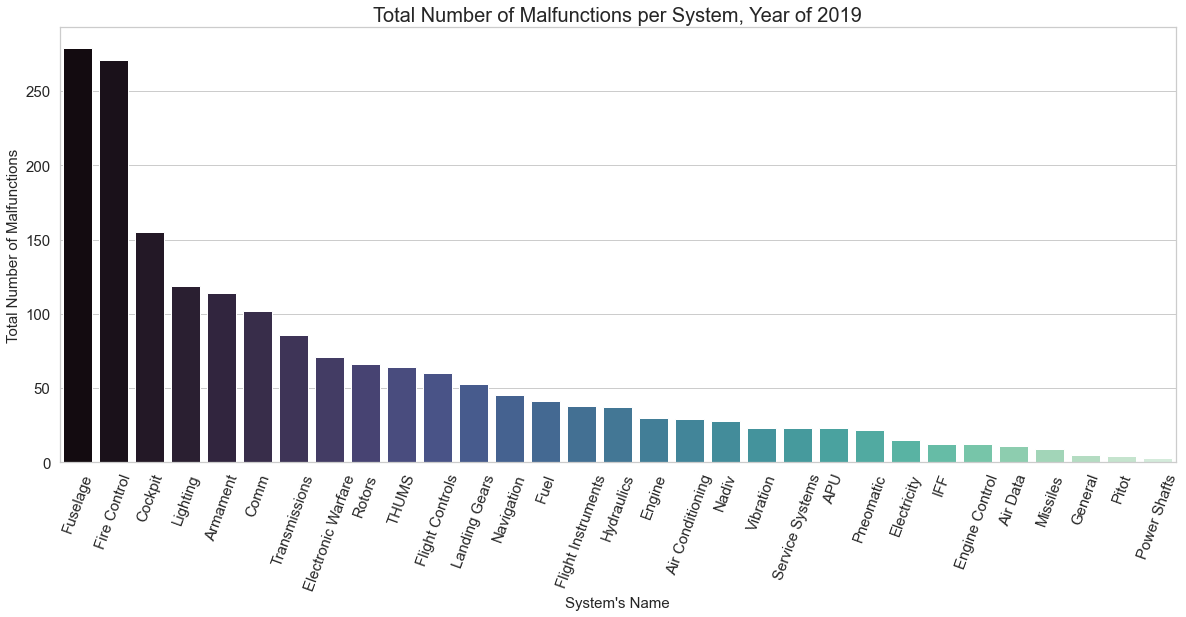

In [780]:
plot_malf_per_system(malf_df_2019, 2019)

**2020**

Let's do the same for 2020:

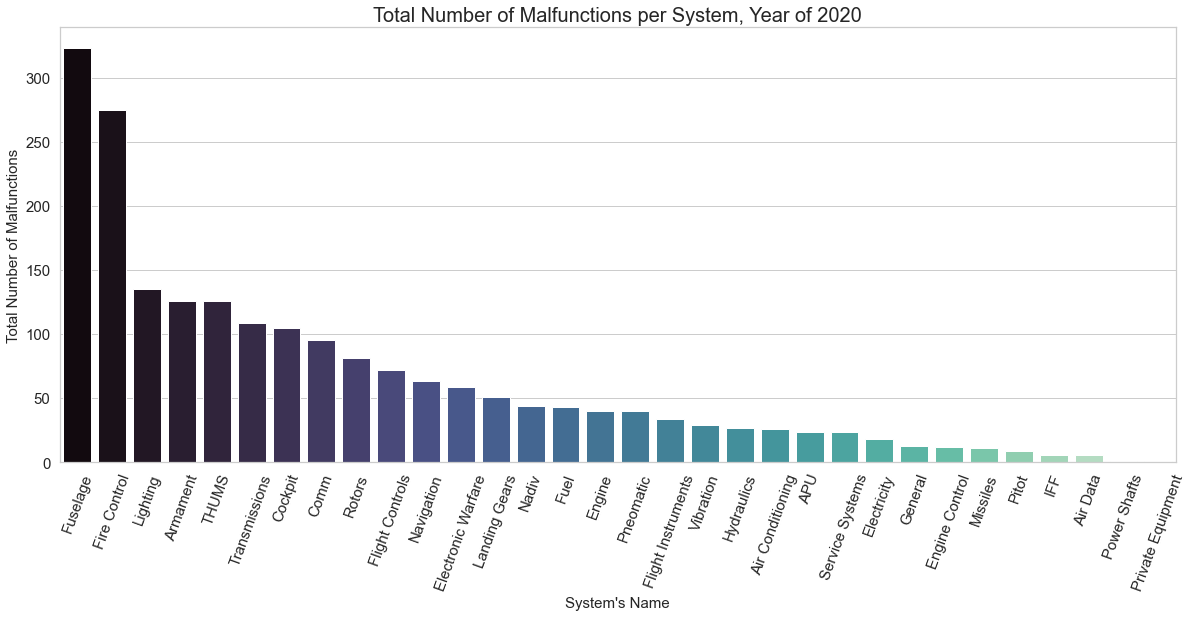

In [781]:
plot_malf_per_system(malf_df_2020, 2020)

***Discussion***

* We can easily see that both "Fuselage" and "Fire Control" systems are reported as having the greatest number of malfunctions for both 2019 and 2020. Moreover, the four next significant systems (in terms of the total number of malfunctions) are the same for both years ("Cockpit", "Lighting", "Armament", "Transmissions" and "Comm").

* In general, the total number and distribution of malfunctions (per system), are appear to be similar for 2019 and 2020. 
* As assumed, the distribution reflected from these diagrams is not a uniform one.

#### Total Number of Malfunctions per Tail Number (Bar Chart, 2019 / 2020)

Without pervious knowledge, we would assume (naively) that the number of malfunctions per tail number shall be relatively close. This assumption relies on the fact that by default the flight activities shall be shared equally as possible between all helicopters, to avoid surplus maintenance activities.

The following diagrams may confirm that assumption.

The following method is meant to prepare the plot's data, out of the given datasets:

In [742]:
def prepare_data_for_malf_per_tail_number_plot(malf_df):
    # Calculate the number of malfunctions per tail number, then saved in a new Pandas Series.
    tail_number_malf_df = pd.DataFrame(malf_df.groupby("Tail Number")["System"].count())

    # Reshape the Dataframe.
    tail_number_malf_df.rename(columns={"System": "Number of Malfunctions"}, inplace = True)
    tail_number_malf_df.reset_index(inplace = True)
    return tail_number_malf_df

Now, let's use it to prepare our data for plotting:

In [743]:
tail_number_malf_df_2019 = prepare_data_for_malf_per_tail_number_plot(malf_df_2019)

tail_number_malf_df_2020 = prepare_data_for_malf_per_tail_number_plot(malf_df_2020)

The following method is meant to serve us when plotting the malfunctions per tail number graphs:

In [744]:
def plot_malf_per_tail_number(malf_df_2019, plot_2019_order_obj, malf_df_2020, plot_2020_order_obj, up_title, y_axis_title):
    # Create a plot comrised to two sub-plots.
    fig, axes = plt.subplots(1, 2, figsize=(25, 8))
    fig.suptitle(up_title, fontsize = 22)

    # Create 2019 subplot using Sea Born countplot.
    plot_2019 = sns.barplot(ax = axes[0],
                          x = "Tail Number",
                          y = "Number of Malfunctions",
                          data = malf_df_2019, 
                          order = plot_2019_order_obj,
                          palette = "mako")
    
    # Determine the sub-plot's titles.
    plot_2019.axes.set_title("2019", fontsize = 20)
    plot_2019.set_xlabel("Tail Number", fontsize = 15)
    plot_2019.set_ylabel(y_axis_title, fontsize = 15)
    plot_2019.tick_params(labelsize = 12)

    # Create 2020 subplot using Sea Born countplot.
    plot_2020 = sns.barplot(ax = axes[1],
                          x = "Tail Number", 
                          y = "Number of Malfunctions",
                          data = malf_df_2020, 
                          order = plot_2020_order_obj, 
                          palette = "mako")

    # Determine the sub-plot's titles.
    plot_2020.axes.set_title("2020", fontsize = 20)
    plot_2020.set_xlabel("Tail Number", fontsize = 15)
    plot_2020.set_ylabel(y_axis_title, fontsize = 15)
    plot_2020.tick_params(labelsize = 12)

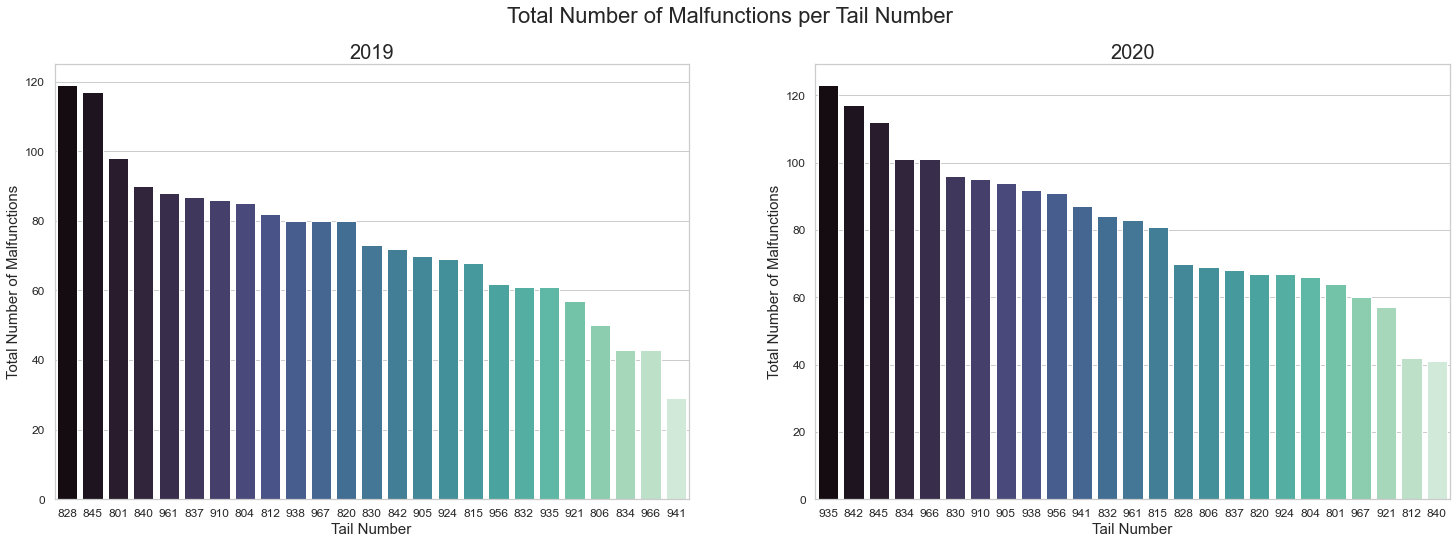

In [745]:
plot_malf_per_tail_number(tail_number_malf_df_2019, 
                          tail_number_malf_df_2019.sort_values("Number of Malfunctions",ascending = False)["Tail Number"], 
                          tail_number_malf_df_2020, 
                          tail_number_malf_df_2020.sort_values("Number of Malfunctions",ascending = False)["Tail Number"], 
                          "Total Number of Malfunctions per Tail Number", 
                          "Total Number of Malfunctions")

***Discussion***

* We can evident that the distribution of malfunctions among helicopters is not exactly uniform, although close to it.
* Each year represents a different scheme; thus, a specific aircraft may have a great number of malfunctions in 2019 but a relatively small one in 2020 (Tail Number 935 for example). It seems that our naive assumption wasn't right.
* The immediate conclusion is that we shall normalize the number of malfunctions, considering different factors, starting with the flight hours each helicopter has flown in that year.

#### Number of Malfunctions per Flight Hour per Tail Number (Bar Chart, 2019 / 2020)

Following the perceeding section, we will normalize the number of malfunctions per helicopter, using its annually flight hours.
Our current exceptation is to have a uniform distribution of malfunctions, based on the assumption that the number of malfunctions discoverd is somehow related to the time a helicopter has spent in air.

The following method is meant to prepare the plot's data, out of the given datasets:

In [746]:
def prepare_data_for_malf_per_flight_hour_per_tail_number_plot(flights_df, malf_df):
    # Calculate the flight duration per tail number, then saved in a new Pandas Series.
    tail_number_flights_duration_df = pd.DataFrame(flights_df.groupby("Tail Number")["Flight Duration"].sum())
    tail_number_flights_duration_df = pd.to_numeric(tail_number_flights_duration_df["Flight Duration"].dt.total_seconds()//3600)

    # Calculate the number of malfunctions per tail number, then saved in a new Pandas Series.
    tail_number_malf_df = pd.DataFrame(malf_df.groupby("Tail Number")["System"].count())
    tail_number_malf_df.index = pd.to_numeric(tail_number_malf_df.index)

    # Apply a join operation, to join the two Dataframes. 
    tail_number_malf_df = tail_number_malf_df.join(tail_number_flights_duration_df)

    # Drop NaN values, since an helicopter (941 in this case()) may have been grounded, due to severe maintenance problems.
    tail_number_malf_df.dropna(inplace = True)
    
    # Save a raw version of the Dataframe, to extract intresting data.
    tail_number_malf__raw_df = tail_number_malf_df.copy(deep = True)

    # Calculate the number of malfunctions per light hour for each tail number.
    tail_number_malf_df["System"] = tail_number_malf_df.iloc[:, 0] / tail_number_malf_df.iloc[:, 1]

    # Reshape the Dataframe.
    tail_number_malf_df.rename(columns={"System": "Number of Malfunctions"}, inplace = True)
    tail_number_malf_df.drop(columns=['Flight Duration'], inplace = True)
    tail_number_malf_df.reset_index(inplace = True)
    return tail_number_malf__raw_df, tail_number_malf_df

Now, let's use it to prepare our data for plotting:

In [747]:
tail_number_malf_raw_df_2019, tail_number_malf_df_2019 = \
    prepare_data_for_malf_per_flight_hour_per_tail_number_plot(flights_df_2019, malf_df_2019)

tail_number_malf_raw_df_2020, tail_number_malf_df_2020 = \
    prepare_data_for_malf_per_flight_hour_per_tail_number_plot(flights_df_2020, malf_df_2020)

Now, let's make use in the already defined method to plot the "Total Number of Malfunctions per Flight Hour per Tail Number" graphs:

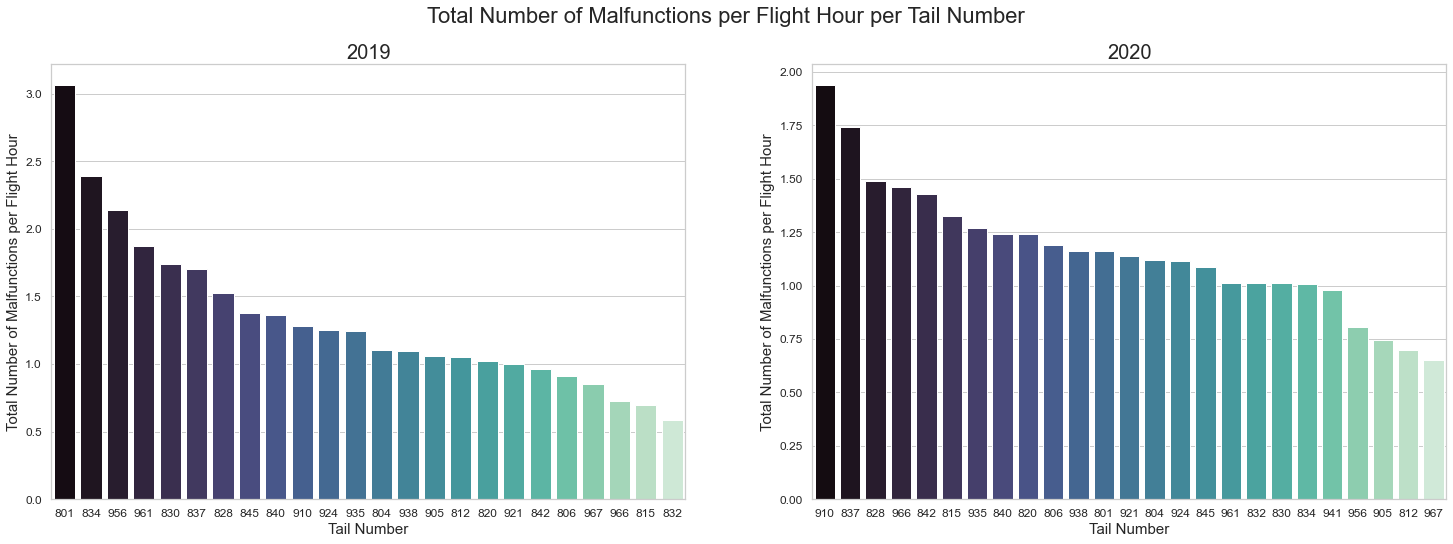

In [748]:
plot_malf_per_tail_number(tail_number_malf_df_2019, 
                          tail_number_malf_df_2019.sort_values("Number of Malfunctions",ascending = False)["Tail Number"],
                          tail_number_malf_df_2020, 
                          tail_number_malf_df_2020.sort_values("Number of Malfunctions",ascending = False)["Tail Number"],
                          "Total Number of Malfunctions per Flight Hour per Tail Number", 
                          "Total Number of Malfunctions per Flight Hour")

***Discussion***

* We can evident that even after taken into account the flight hours each helicopter has flown, the distribution of malfunctions among helicopters is not uniform. Thus, we shall further look for other factors which impacts this issue.
* By comparing the two plots, we can see that specific helicopters (such as the 967) preserve a small number of malfunctions considering their flight time, during both years.
* In general, 2020 presents more malfunctions per flight hour in average, than 2019.

#### Total Number of Malfunctions per Overall Flights' Duration (Joint Plot, 2019 & 2020)

Not once I faced with the assumption that "helicopters who flies much suffer much", meaning if you fly more, you are expected to have an increased number of malfunctions. Of course, an opposite assumption exists too. It mostly depends on who you met, and what his mood is today.

Thus, in this section, we would like to examine if there is a linear correlation between the overall flights duration, and the total number of malfunctions. This will be done using last section's data (per the given tail numbers’ flights and reported malfunctions serving as the data samples).

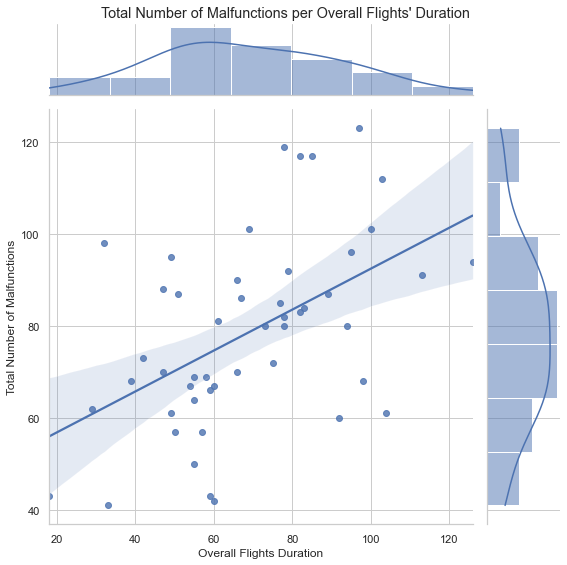

In [749]:
# Concat the two Dataframe to form a single Dataframe to sample from.
malf_per_flight_duration_df = pd.concat([tail_number_malf_raw_df_2019, tail_number_malf_raw_df_2020], ignore_index=True)
malf_per_flight_duration_df.rename(columns={"System": "Total Number of Malfunctions", 
                                            "Flight Duration": "Overall Flights Duration"}, inplace = True)
  
# Create the plot, using Sea Born joint plot.
plot = sns.jointplot(x = "Overall Flights Duration", y = "Total Number of Malfunctions", data = malf_per_flight_duration_df, 
                     palette="Set1", kind="reg", height = 8)
# Add a title.
plot.fig.suptitle("Total Number of Malfunctions per Overall Flights' Duration")
plot.fig.subplots_adjust(top=0.95) 

Person correlation coefficient for the given samples is:

In [750]:
print(np.corrcoef(malf_per_flight_duration_df.iloc[:, 0], malf_per_flight_duration_df.iloc[:, 1])[0][1])

0.5045768624892558


***Discussion***

* There is a moderate positive linear correlation between the two.
* We can't jump to conclusions yet and argue (for example) that a long overall flights' duration cause more malfunctions to occur. A competing assumption could be that because spenting more time in air, the air crew may have the chance to report more malfunctions.

#### Mean Number of Malfunctions per Time Intervals Between Flights (Scatter Plot, 2019 / 2020)

In [ ]:
test = flights_df_2019.copy(deep = True)

test["Interval"] = flights_df_2019.sort_values(["Tail Number","Landing Time"]).groupby("Tail Number")["Landing Time"].diff()

test.dropna(inplace = True)

test

#### Mean Time Between Reported Malfunctions per Tail Number (Bar Chart, 2019 / 2020)

#### Distribution of Flight Hours Between Tail Numbers (Pie Chart, 2019 / 2020)

#### Malfunctions' Types Cross Tail Numbers Heatmap (2019 / 2020)

#### Total Number of Malfunctions per User Type (Bar Chart, 2019 / 2020)

#### Un-Verified Malfunctions' Types Distribution (Nested Pie Chart, 2019 / 2020)

#### Pilots' Reported Malfunctions' Types Distribution (Nested Pie Chart, 2019 / 2020)

#### Total Number of Malfunctions per Type at Ramon Air Force Base (Bar Chart, 2019 / 2020)

#### Total Number of Malfunctions per Type at Ramat David Air Force Base (Bar Chart, 2019 / 2020)

#### Mean Time for Handling a Malfunction per Type at Ramon Air Force Base (Bar Chart, 2019 / 2020)

#### Mean Time for Handling a Malfunction per Type at Ramat David Air Force Base (Bar Chart, 2019 / 2020)

#### Mean Time for Reporting a new Malfunction per Type at Ramon Air Force Base (Bar Chart, 2019 / 2020)

#### Mean Time for Reporting a new Malfunction per Type at Ramat David Air Force Base (Bar Chart, 2019 / 2020)

### 4.1.2 Malfunctions and Weather Phenomena

### 4.1.2.1 Understanding the Weather Variables

#### Total Number of Raining Days per Month at Ramon Air Force Base (Bar Chart, 2019 / 2020)

#### Total Number of Raining Days per Month at Ramat David Air Force Base (Bar Chart, 2019 / 2020)

#### Rainfall per Month at Ramon Air Force Base (Bar Chart, 2019 / 2020)

#### Rainfall per Month at Ramat David Air Force Base (Bar Chart, 2019 / 2020)

#### Mean Temperature per Month at Ramon Air Force Base (Bar Chart, 2019 / 2020)

#### Mean Temperature per Month at Ramat David Air Force Base (Bar Chart, 2019 / 2020)

#### 5 Windows a Day Mean Humidity per Month at Ramon Air Force Base (Nested Bar Chart, 2019 / 2020)

#### 5 Windows a Day Mean Humidity per Month at Ramat David Air Force Base (Nested Bar Chart, 2019 / 2020)

### 4.1.2.2 Analyzing the Impacts of Outdoor Parking

#### Rain intensity and Malfunctions (Jointgrid, 2019 / 2020)

#### Temperature and Malfunctions (Jointgrid, 2019 / 2020)

#### Mean Wind Velocity and Malfunctions (Jointgrid, 2019 / 2020)

East (090)

West (270)

#### Temperature Value Cross Malfunctions' Types Heatmap (2019 / 2020)

#### Rainfall (mm) Cross Malfunctions' Types Heatmap (2019 / 2020)

#### Mean Humidity Values Cross Malfunctions' Types Heatmap (2019 / 2020)

#### Weather Variables and Malfunctions' Types (Classes) Swarm Plot

#### Weather Variables Scatter Matrix

### 4.1.2.3 Analyzing the Weather Impacts during Flights

#### Rain intensity and Malfunctions (Jointgrid, 2019 / 2020)

#### Temperature and Malfunctions (Jointgrid, 2019 / 2020)

#### Temperature Value Cross Malfunctions' Types Heatmap (2019 / 2020)

#### Rainfall (mm) Cross Malfunctions' Types Heatmap (2019 / 2020)

#### Weather Variables (Temperature, Rain) and Malfunctions' Types (Classes) Swarm Plot

#### Weather Variables (Temperature, Rain) Scatter Matrix

### 4.1.2.4 Analyzing the Impacts of the Weekly Flight Plan

#### Discrete Distribution (as Horizontal Bar Chart) of Malfunctions' Types per Week's Days (2019 / 2020)

### 4.2 Helicopters-Malfunctions Graph - an Additional Point of View

#### 4.2.1 Processing the Datasets

#### 4.2.2 Builidng a Two-Sided Graph to Describe the Possible Connections Between Helicopters (using NetworkX)

#### 4.2.3 Weighted Projection (Linking Helicopters)


#### 4.2.4 Discussion

### 4.3 Analyzing the Impacts of Different Weekly Flight Plans on Malfunctions

#### 4.3.1 Weeks Clustering by their Weekly Flight Plan Pattern using K-Means

#### 4.3.2 Weeks Clustering by their Weekly Flight Plan Pattern using Gaussian Mixture Model

#### 4.3.3 Comparing the Models' Results

#### 4.3.3 Displaying Statistics of Different Weekly Flight Plans

#### 4.3.4 Discrete Distribution (as Horizontal Bar Chart) of Malfunctions' Types per Weekly Flight Plans

#### 4.3.5 Mean Time for Handling a Malfunction per Weekly Flight Plans

#### 4.3.6.	Discussion

### 4.4 Building a Regression Model for Classifying Malfunctions Based on Weather Variables (Parking)

#### 4.4.1 Shaping the Datasets

#### 4.4.2 Selecting the Independent Variables and Class Categories (Based on the EDA Phase)

#### 4.4.3 KNN

#### 4.4.4 Logistic Regression 

#### 4.4.5 Navie Bayes

#### 4.4.6 Random Forest 

#### 4.4.7 Stacking (Optional)

#### 4.4.8 Discussion

### 4.5 Building a Regression Model for Classifying Malfunctions Based on Weather Variables (Flights)

#### 4.5.1 Shaping the Datasets

#### 4.5.2 Selecting the Independent Variables and Class Categories (Based on the EDA Phase)

#### 4.5.3 KNN

#### 4.5.4 Logistic Regression 

#### 4.5.5 Navie Bayes

#### 4.5.6 Random Forest 

#### 4.5.7 Stacking (Optional)

#### 4.5.8 Discussion

### 4.6 Parking vs. Flights Differences (Discussion)

## 5. Conclusions